# 1. Import Librares

In [36]:
# ---- Basic scientific libraries ----
%pip install numpy pandas matplotlib seaborn

# ---- Scikit-learn ----
%pip install scikit-learn

# ---- XGBoost ----
%pip install xgboost

# ---- Imbalanced-learn ----
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [37]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
)
from sklearn.feature_selection import mutual_info_regression
from xgboost import XGBClassifier

# Imbalance handling
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# Styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)

print("✓ All libraries imported successfully")

✓ All libraries imported successfully


# 2. Data Loading & Initial Exploration

In [38]:
# Load datasets
app_data = pd.read_csv('../data/raw/application_record.csv')
credit_data = pd.read_csv('../data/raw/credit_record.csv')

print(f"📊 Application Records: {app_data.shape[0]:,} rows, {app_data.shape[1]} columns")
print(f"📊 Credit Records: {credit_data.shape[0]:,} rows, {credit_data.shape[1]} columns")
print(f"👥 Unique Applicants: {app_data['ID'].nunique():,}")
print(f"🔗 Common IDs: {len(set(app_data['ID']).intersection(set(credit_data['ID']))):,}")

📊 Application Records: 438,557 rows, 18 columns
📊 Credit Records: 1,048,575 rows, 3 columns
👥 Unique Applicants: 438,510
🔗 Common IDs: 36,457


In [39]:
application_record_df = pd.read_csv('../data/raw/application_record.csv')
application_record_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [40]:
print("\n" + "="*80)
print("APPLICATION DATA SAMPLE")
print("="*80)
display(app_data.head())

print("\n" + "="*80)
print("CREDIT RECORD SAMPLE")
print("="*80)
display(credit_data.head(20))


APPLICATION DATA SAMPLE


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0



CREDIT RECORD SAMPLE


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


Size of Data

In [41]:
print("="*80)
print("DATA QUALITY CHECK")
print("="*80)

print("\n📋 Credit Data Info:")
credit_data.info()

print("\n📋 Application Data Info:")
app_data.info()

print("\n🔍 Missing Values - Credit Data:")
print(credit_data.isnull().sum())

print("\n🔍 Missing Values - Application Data:")
print(app_data.isnull().sum())

DATA QUALITY CHECK

📋 Credit Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB

📋 Application Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE 

# 3. Exploratory Data Analysis (EDA)

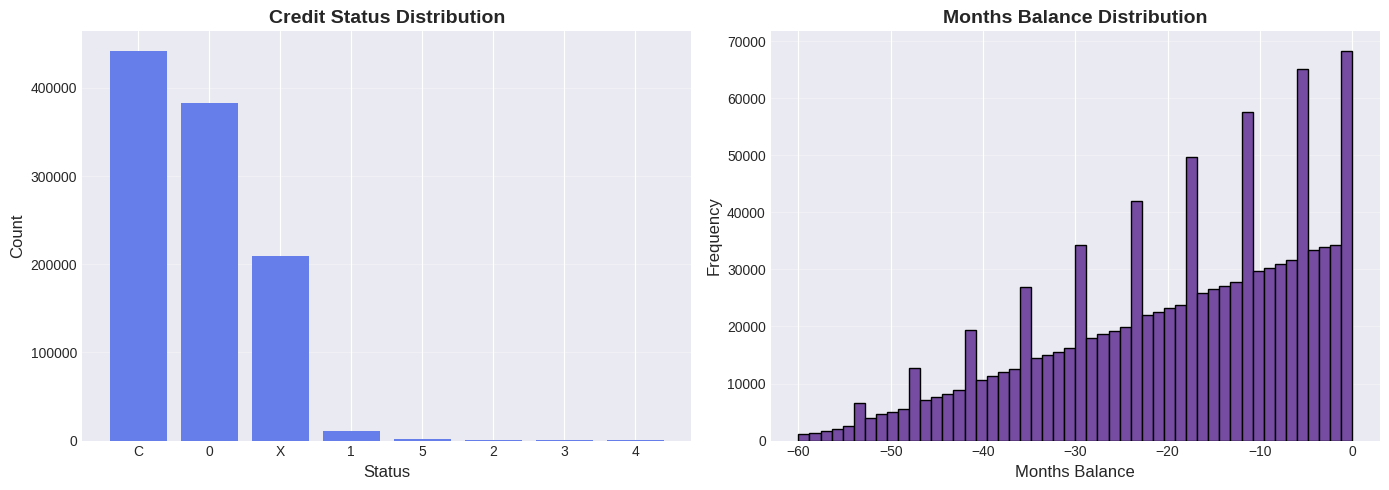


📊 Status Value Counts:
STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64

📊 Months Balance Range: -60 to 0


In [42]:
# Visualize credit status distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Status counts
status_counts = credit_data['STATUS'].value_counts()
axes[0].bar(status_counts.index, status_counts.values, color='#667eea')
axes[0].set_xlabel('Status', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Credit Status Distribution', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')

# Months balance distribution
axes[1].hist(credit_data['MONTHS_BALANCE'], bins=50, color='#764ba2', edgecolor='black')
axes[1].set_xlabel('Months Balance', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Months Balance Distribution', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\n📊 Status Value Counts:")
print(credit_data['STATUS'].value_counts())
print(f"\n📊 Months Balance Range: {credit_data['MONTHS_BALANCE'].min()} to {credit_data['MONTHS_BALANCE'].max()}")

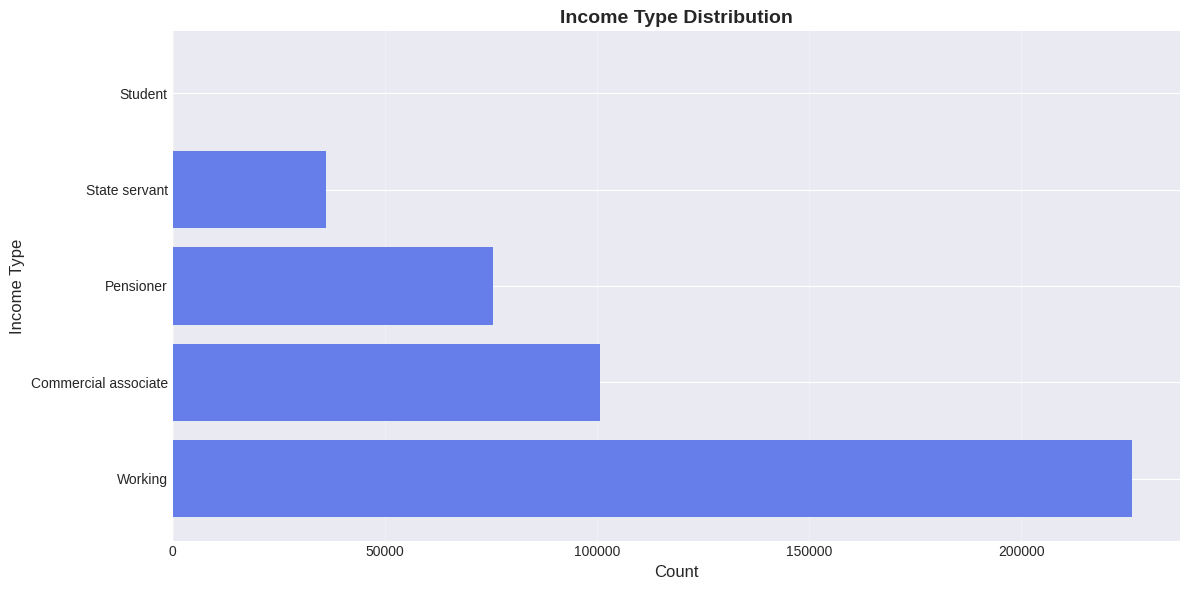

In [43]:
plt.figure(figsize=(12, 6))
income_counts = app_data['NAME_INCOME_TYPE'].value_counts()
plt.barh(income_counts.index, income_counts.values, color='#667eea')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Income Type', fontsize=12)
plt.title('Income Type Distribution', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()



# 4. Data Preprocessing & Feature Engineering

In [44]:
# Create Good/Bad labels from STATUS
credit_data['Good or Bad'] = credit_data['STATUS'].apply(
    lambda x: 'Good' if x in ['0', 'X', 'C'] else 'Bad'
)

# Group by ID and label
credit_goods_bads = credit_data.groupby(['ID', 'Good or Bad']).size().to_frame('size')
credit_goods_bads.reset_index(inplace=True)

# Get the dominant label for each customer
idx = credit_goods_bads.groupby('ID')['size'].idxmax()
max_goods_bads = credit_goods_bads.loc[idx]

# Convert to binary (1=Good, 0=Bad)
max_goods_bads['Label'] = max_goods_bads['Good or Bad'].apply(lambda x: 1 if x == 'Good' else 0)
max_goods_bads = max_goods_bads[['ID', 'Label']].reset_index(drop=True)

print(f"✓ Created target labels for {len(max_goods_bads):,} customers")
print(f"\nLabel Distribution:")
print(f"  Good (1): {(max_goods_bads['Label'] == 1).sum():,} ({(max_goods_bads['Label'] == 1).sum() / len(max_goods_bads) * 100:.1f}%)")
print(f"  Bad (0):  {(max_goods_bads['Label'] == 0).sum():,} ({(max_goods_bads['Label'] == 0).sum() / len(max_goods_bads) * 100:.1f}%)")

✓ Created target labels for 45,985 customers

Label Distribution:
  Good (1): 45,800 (99.6%)
  Bad (0):  185 (0.4%)


# 5. Target Variable Construction

✓ Merged dataset: 36,457 rows, 19 columns

Common IDs: 36,457


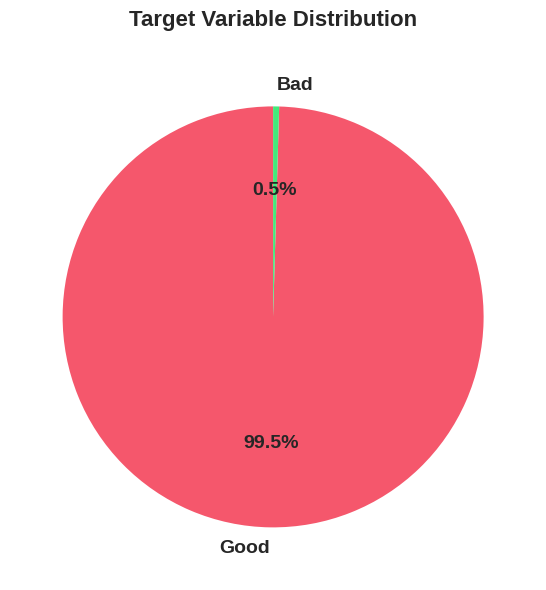

In [45]:
# Fill missing occupation
app_data.fillna('Unknown', inplace=True)

# Merge application and credit data
data = pd.merge(app_data, max_goods_bads, how='inner', on='ID')

print(f"✓ Merged dataset: {len(data):,} rows, {data.shape[1]} columns")
print(f"\nCommon IDs: {len(set(app_data['ID']).intersection(set(max_goods_bads['ID']))):,}")

# Visualize target distribution
fig, ax = plt.subplots(figsize=(8, 6))
target_counts = data['Label'].value_counts()
colors = ['#f5576c', '#43e97b']
ax.pie(target_counts.values, labels=['Good', 'Bad'], autopct='%1.1f%%', 
       colors=colors, startangle=90, textprops={'fontsize': 14, 'fontweight': 'bold'})
ax.set_title('Target Variable Distribution', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# 6. Feature Selection & Analysis

In [46]:
# Prepare features and target
X = data.drop('Label', axis=1)
y = data['Label']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures: {list(X.columns)}")

Features shape: (36457, 18)
Target shape: (36457,)

Features: ['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']


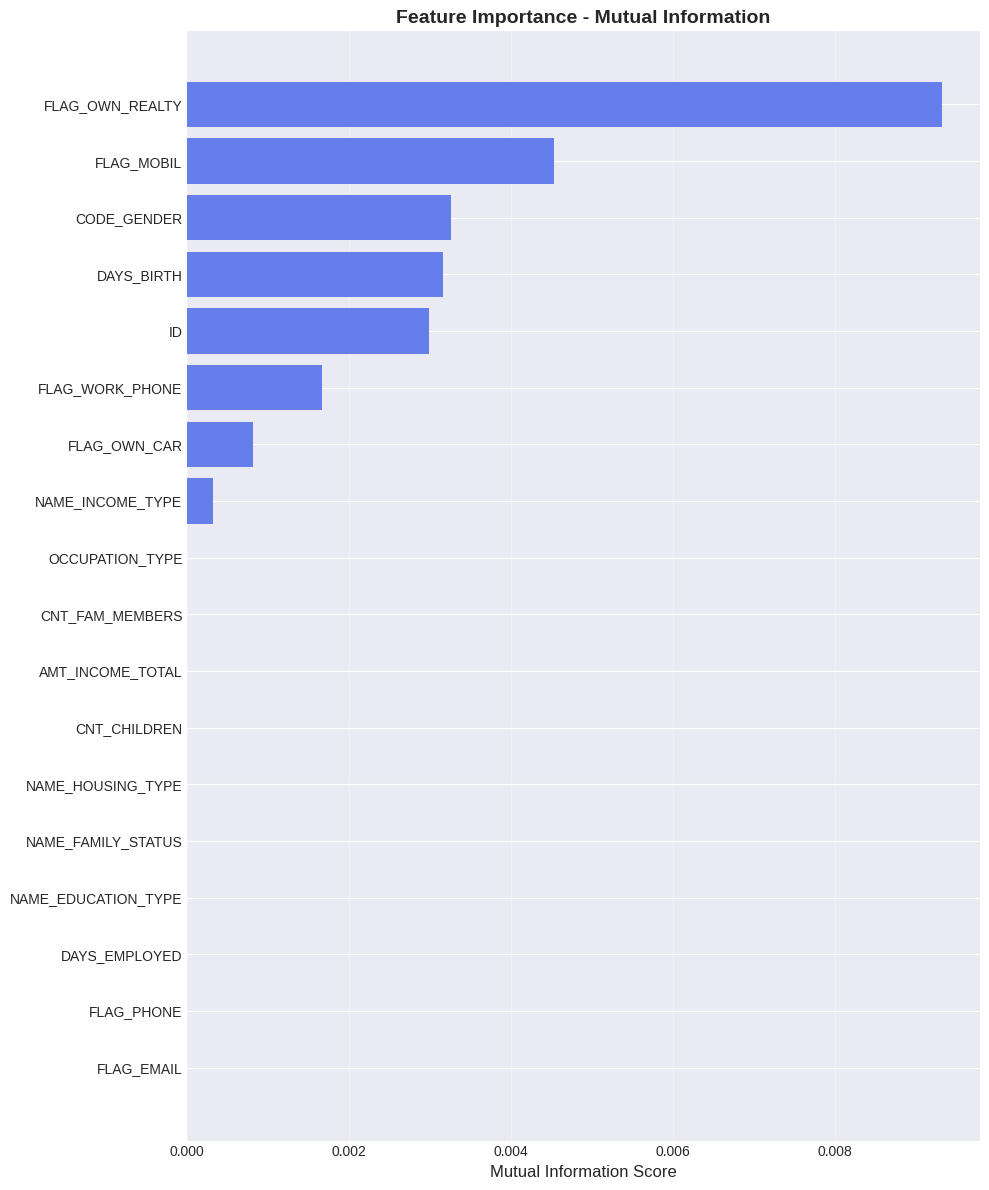


Top 10 Most Important Features:


FLAG_OWN_REALTY     0.009326
FLAG_MOBIL          0.004526
CODE_GENDER         0.003256
DAYS_BIRTH          0.003152
ID                  0.002986
FLAG_WORK_PHONE     0.001668
FLAG_OWN_CAR        0.000815
NAME_INCOME_TYPE    0.000311
AMT_INCOME_TOTAL    0.000000
CNT_CHILDREN        0.000000
Name: MI Scores, dtype: float64

In [47]:
# Calculate mutual information scores
X_info = X.copy()

# Encode categorical features
for colname in X_info.select_dtypes("object"):
    X_info[colname], _ = X_info[colname].factorize()

# Convert floats to ints
for colname in X_info.select_dtypes("float"):
    X_info[colname] = X_info[colname].astype(int)

discrete_features = X_info.dtypes != int

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_info, y, discrete_features)

# Plot
plt.figure(figsize=(10, 12))
mi_scores_sorted = mi_scores.sort_values(ascending=True)
plt.barh(range(len(mi_scores_sorted)), mi_scores_sorted.values, color='#667eea')
plt.yticks(range(len(mi_scores_sorted)), mi_scores_sorted.index)
plt.xlabel('Mutual Information Score', fontsize=12)
plt.title('Feature Importance - Mutual Information', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
display(mi_scores.head(10))

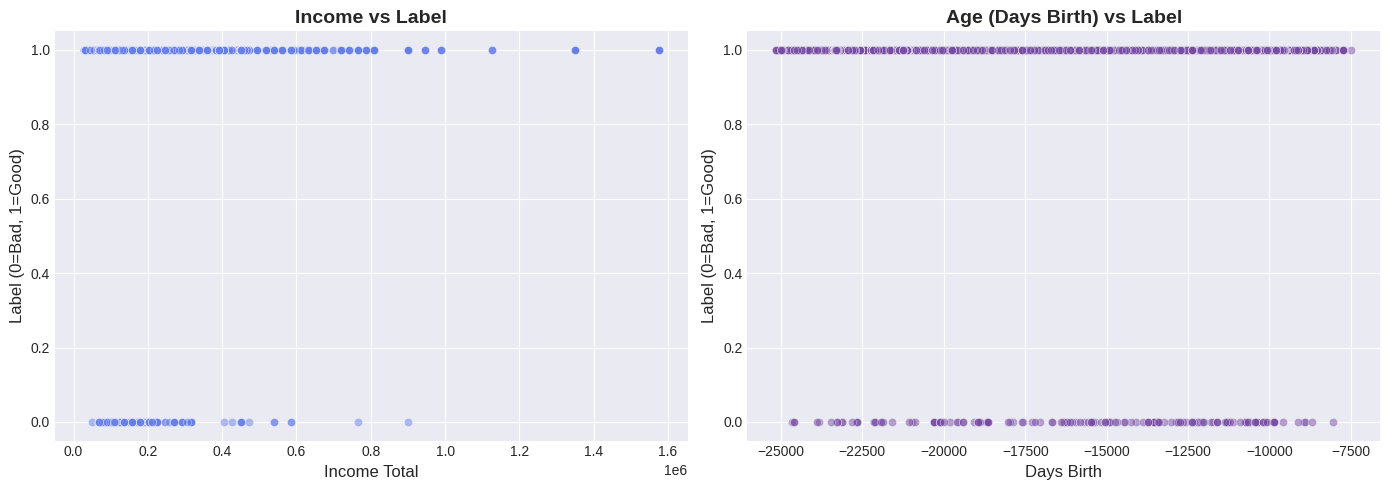

In [48]:
# Visualize key relationships
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(data=data, x='AMT_INCOME_TOTAL', y='Label', alpha=0.5, ax=axes[0], color='#667eea')
axes[0].set_title('Income vs Label', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Income Total', fontsize=12)
axes[0].set_ylabel('Label (0=Bad, 1=Good)', fontsize=12)

sns.scatterplot(data=data, x='DAYS_BIRTH', y='Label', alpha=0.5, ax=axes[1], color='#764ba2')
axes[1].set_title('Age (Days Birth) vs Label', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Days Birth', fontsize=12)
axes[1].set_ylabel('Label (0=Bad, 1=Good)', fontsize=12)

plt.tight_layout()
plt.show()

In [49]:
# Convert categorical to numerical
X_encoded = pd.get_dummies(X, drop_first=True)

print(f"✓ Encoded features shape: {X_encoded.shape}")
print(f"✓ Number of features after encoding: {X_encoded.shape[1]}")

✓ Encoded features shape: (36457, 48)
✓ Number of features after encoding: 48


In [50]:
print("="*80)
print("PREPROCESSING PIPELINE")
print("="*80)

# Step 1: One-hot encode
X_encoded = pd.get_dummies(X, drop_first=True)
print(f"\n✓ Encoded features: {X_encoded.shape}")

# Step 2: Apply SMOTE + Tomek to FULL dataset
print("\n📊 Applying SMOTE + Tomek Links to full dataset...")
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_encoded, y)

print(f"  Before: {len(X_encoded):,} samples")
print(f"  After: {len(X_resampled):,} samples")
print(f"  Good (1): {(y_resampled == 1).sum():,}")
print(f"  Bad (0): {(y_resampled == 0).sum():,}")

# Step 3: Scale
print("\n📏 Scaling features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Step 4: PCA
print("\n🔬 Applying PCA...")
pca = PCA(n_components=5, random_state=42)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(5)])

print(f"✓ PCA components: {X_pca.shape[1]}")
print(f"✓ Explained variance: {pca.explained_variance_ratio_.sum():.4f}")

# Step 5: NOW split
print("\n✂️ Splitting data...")
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    pca_df, y_resampled, test_size=0.2, random_state=42
)

print(f"✓ Training set: {X_train_pca.shape}")
print(f"✓ Test set: {X_test_pca.shape}")

PREPROCESSING PIPELINE

✓ Encoded features: (36457, 48)

📊 Applying SMOTE + Tomek Links to full dataset...
  Before: 36,457 samples
  After: 72,496 samples
  Good (1): 36,248
  Bad (0): 36,248

📏 Scaling features...

🔬 Applying PCA...
✓ PCA components: 5
✓ Explained variance: 0.2686

✂️ Splitting data...
✓ Training set: (57996, 5)
✓ Test set: (14500, 5)


# Handling Imbalanced Data - SMOTE + Tomek Links

SMOTE + TOMEK LINKS - CLASS BALANCE VISUALIZATION

📊 Before SMOTE + Tomek (Original Data):
  Total: 36,457
  Good (1): 36,290 (99.54%)
  Bad (0): 167 (0.46%)
  Imbalance Ratio: 217.31:1

📊 After SMOTE + Tomek (Resampled Data):
  Total: 72,496
  Good (1): 36,248 (50.00%)
  Bad (0): 36,248 (50.00%)
  Balance Ratio: 1.00:1


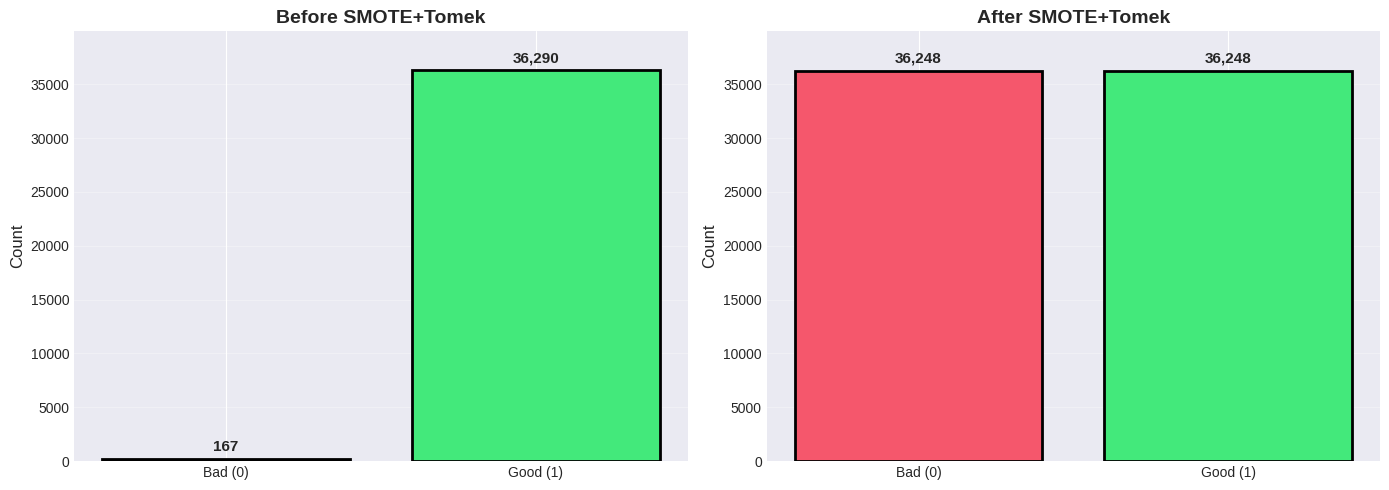

In [51]:
# Visualize SMOTE + Tomek Links Results
print("="*80)
print("SMOTE + TOMEK LINKS - CLASS BALANCE VISUALIZATION")
print("="*80)

print(f"\n📊 Before SMOTE + Tomek (Original Data):")
print(f"  Total: {len(y):,}")
print(f"  Good (1): {(y == 1).sum():,} ({(y == 1).sum() / len(y) * 100:.2f}%)")
print(f"  Bad (0): {(y == 0).sum():,} ({(y == 0).sum() / len(y) * 100:.2f}%)")
print(f"  Imbalance Ratio: {(y == 1).sum() / (y == 0).sum():.2f}:1")

print(f"\n📊 After SMOTE + Tomek (Resampled Data):")
print(f"  Total: {len(y_resampled):,}")
print(f"  Good (1): {(y_resampled == 1).sum():,} ({(y_resampled == 1).sum() / len(y_resampled) * 100:.2f}%)")
print(f"  Bad (0): {(y_resampled == 0).sum():,} ({(y_resampled == 0).sum() / len(y_resampled) * 100:.2f}%)")
print(f"  Balance Ratio: {(y_resampled == 1).sum() / (y_resampled == 0).sum():.2f}:1")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before
before_counts = pd.Series(y).value_counts().sort_index()
axes[0].bar(['Bad (0)', 'Good (1)'], [before_counts[0], before_counts[1]], 
            color=['#f5576c', '#43e97b'], edgecolor='black', linewidth=2)
axes[0].set_title('Before SMOTE+Tomek', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(alpha=0.3, axis='y')
axes[0].set_ylim([0, max(before_counts.max(), (y_resampled == 1).sum()) * 1.1])
for i, (label, count) in enumerate(zip(['Bad (0)', 'Good (1)'], [before_counts[0], before_counts[1]])):
    axes[0].text(i, count + 500, f'{count:,}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# After
after_counts = pd.Series(y_resampled).value_counts().sort_index()
axes[1].bar(['Bad (0)', 'Good (1)'], [after_counts[0], after_counts[1]], 
            color=['#f5576c', '#43e97b'], edgecolor='black', linewidth=2)
axes[1].set_title('After SMOTE+Tomek', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=12)
axes[1].grid(alpha=0.3, axis='y')
axes[1].set_ylim([0, max(before_counts.max(), (y_resampled == 1).sum()) * 1.1])
for i, (label, count) in enumerate(zip(['Bad (0)', 'Good (1)'], [after_counts[0], after_counts[1]])):
    axes[1].text(i, count + 500, f'{count:,}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

# 8. Dimensionality Reduction with PCA

PCA ANALYSIS

✓ Explained variance ratio:
  PC1: 0.0895 (8.95%)
  PC2: 0.0522 (5.22%)
  PC3: 0.0471 (4.71%)
  PC4: 0.0426 (4.26%)
  PC5: 0.0373 (3.73%)

✓ Total variance explained: 0.2686 (26.86%)


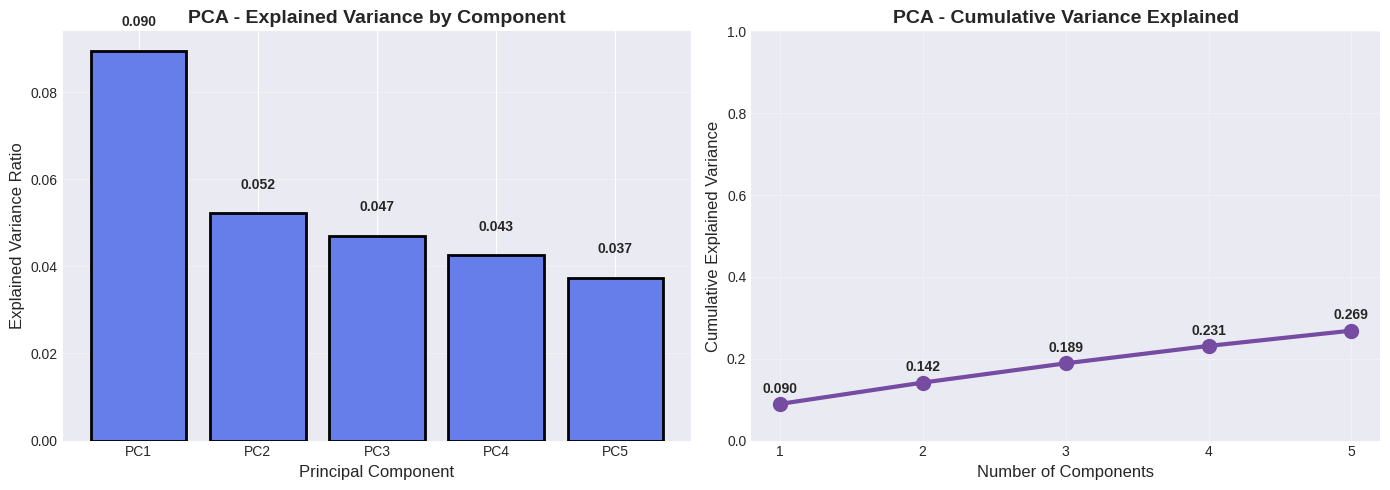

In [52]:
# Visualize PCA Explained Variance
print("="*80)
print("PCA ANALYSIS")
print("="*80)

print(f"\n✓ Explained variance ratio:")
for i, var in enumerate(pca.explained_variance_ratio_, 1):
    print(f"  PC{i}: {var:.4f} ({var*100:.2f}%)")
print(f"\n✓ Total variance explained: {pca.explained_variance_ratio_.sum():.4f} ({pca.explained_variance_ratio_.sum()*100:.2f}%)")

# Visualize explained variance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Individual variance
axes[0].bar(range(1, 6), pca.explained_variance_ratio_, color='#667eea', edgecolor='black', linewidth=2)
axes[0].set_xlabel('Principal Component', fontsize=12)
axes[0].set_ylabel('Explained Variance Ratio', fontsize=12)
axes[0].set_title('PCA - Explained Variance by Component', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(1, 6))
axes[0].set_xticklabels([f'PC{i}' for i in range(1, 6)])
axes[0].grid(alpha=0.3, axis='y')

# Add value labels
for i, var in enumerate(pca.explained_variance_ratio_, 1):
    axes[0].text(i, var + 0.005, f'{var:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Cumulative variance
cumulative_var = np.cumsum(pca.explained_variance_ratio_)
axes[1].plot(range(1, 6), cumulative_var, marker='o', color='#764ba2', linewidth=3, markersize=10)
axes[1].set_xlabel('Number of Components', fontsize=12)
axes[1].set_ylabel('Cumulative Explained Variance', fontsize=12)
axes[1].set_title('PCA - Cumulative Variance Explained', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(1, 6))
axes[1].grid(alpha=0.3)
axes[1].set_ylim([0, 1])

# Add value labels
for i, var in enumerate(cumulative_var, 1):
    axes[1].text(i, var + 0.02, f'{var:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

PCA - COMPONENT VISUALIZATION


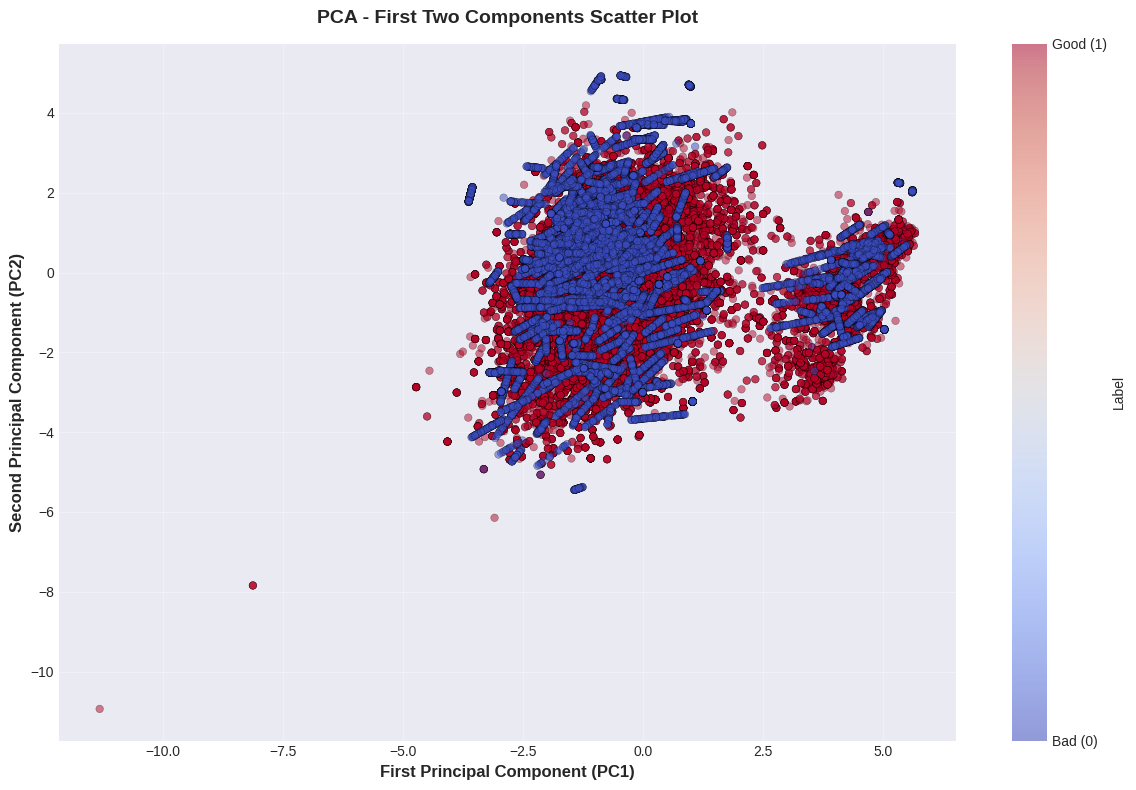


✓ PC1 explains 8.95% of variance
✓ PC2 explains 5.22% of variance
✓ Together: 14.17% of total variance


In [53]:
# Visualize first 2 principal components
print("="*80)
print("PCA - COMPONENT VISUALIZATION")
print("="*80)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_resampled, 
                     cmap='coolwarm', alpha=0.5, edgecolors='black', linewidth=0.3, s=30)
plt.xlabel('First Principal Component (PC1)', fontsize=12, fontweight='bold')
plt.ylabel('Second Principal Component (PC2)', fontsize=12, fontweight='bold')
plt.title('PCA - First Two Components Scatter Plot', fontsize=14, fontweight='bold', pad=15)
cbar = plt.colorbar(scatter, label='Label')
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Bad (0)', 'Good (1)'])
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n✓ PC1 explains {pca.explained_variance_ratio_[0]*100:.2f}% of variance")
print(f"✓ PC2 explains {pca.explained_variance_ratio_[1]*100:.2f}% of variance")
print(f"✓ Together: {(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1])*100:.2f}% of total variance")

In [54]:
# Final Dataset Summary
print("="*80)
print("FINAL DATASET SPLIT SUMMARY")
print("="*80)

print(f"\n📊 Training Set:")
print(f"  Shape: {X_train_pca.shape}")
print(f"  Features: {X_train_pca.shape[1]} PCA components")
print(f"  Samples: {X_train_pca.shape[0]:,}")
print(f"  Good (1): {(y_train_pca == 1).sum():,} ({(y_train_pca == 1).sum() / len(y_train_pca) * 100:.2f}%)")
print(f"  Bad (0): {(y_train_pca == 0).sum():,} ({(y_train_pca == 0).sum() / len(y_train_pca) * 100:.2f}%)")

print(f"\n📊 Test Set:")
print(f"  Shape: {X_test_pca.shape}")
print(f"  Features: {X_test_pca.shape[1]} PCA components")
print(f"  Samples: {X_test_pca.shape[0]:,}")
print(f"  Good (1): {(y_test_pca == 1).sum():,} ({(y_test_pca == 1).sum() / len(y_test_pca) * 100:.2f}%)")
print(f"  Bad (0): {(y_test_pca == 0).sum():,} ({(y_test_pca == 0).sum() / len(y_test_pca) * 100:.2f}%)")

print(f"\n✅ Data is ready for model training!")

FINAL DATASET SPLIT SUMMARY

📊 Training Set:
  Shape: (57996, 5)
  Features: 5 PCA components
  Samples: 57,996
  Good (1): 29,009 (50.02%)
  Bad (0): 28,987 (49.98%)

📊 Test Set:
  Shape: (14500, 5)
  Features: 5 PCA components
  Samples: 14,500
  Good (1): 7,239 (49.92%)
  Bad (0): 7,261 (50.08%)

✅ Data is ready for model training!


In [55]:
print("="*80)
print("TRAINING XGBOOST MODEL")
print("="*80)

# Train XGBoost
xgb_model = XGBClassifier(n_estimators=500, max_depth=3, random_state=42, eval_metric='logloss')
xgb_model.fit(X_train_pca, y_train_pca)

print("\n✓ Model trained successfully")

# Predictions (no need to transform test data - it's already PCA'd)
y_pred = xgb_model.predict(X_test_pca)
y_pred_proba = xgb_model.predict_proba(X_test_pca)[:, 1]

print("✓ Predictions generated")

TRAINING XGBOOST MODEL

✓ Model trained successfully
✓ Predictions generated


# Model Evaluation & Results

In [56]:
print("="*80)
print("MODEL PERFORMANCE METRICS")
print("="*80)

# Calculate metrics - USE y_test_pca (not y_test)
accuracy = accuracy_score(y_test_pca, y_pred)
precision = precision_score(y_test_pca, y_pred, zero_division=0)
recall = recall_score(y_test_pca, y_pred, zero_division=0)
f1 = f1_score(y_test_pca, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test_pca, y_pred_proba)

print(f"\nOverall Metrics:")
print(f"  Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"  Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"  Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"  F1-Score:  {f1:.4f}")
print(f"  ROC-AUC:   {roc_auc:.4f}")

print("\n" + "="*80)
print("CLASSIFICATION REPORT")
print("="*80)
print(classification_report(y_test_pca, y_pred, target_names=['Bad (0)', 'Good (1)']))

MODEL PERFORMANCE METRICS

Overall Metrics:
  Accuracy:  0.9592 (95.92%)
  Precision: 0.9661 (96.61%)
  Recall:    0.9518 (95.18%)
  F1-Score:  0.9589
  ROC-AUC:   0.9916

CLASSIFICATION REPORT
              precision    recall  f1-score   support

     Bad (0)       0.95      0.97      0.96      7261
    Good (1)       0.97      0.95      0.96      7239

    accuracy                           0.96     14500
   macro avg       0.96      0.96      0.96     14500
weighted avg       0.96      0.96      0.96     14500



CONFUSION MATRIX BREAKDOWN

True Negatives (Correctly identified Bad):   7,019
False Positives (Bad labeled as Good):       242
False Negatives (Good labeled as Bad):       349
True Positives (Correctly identified Good):  6,890


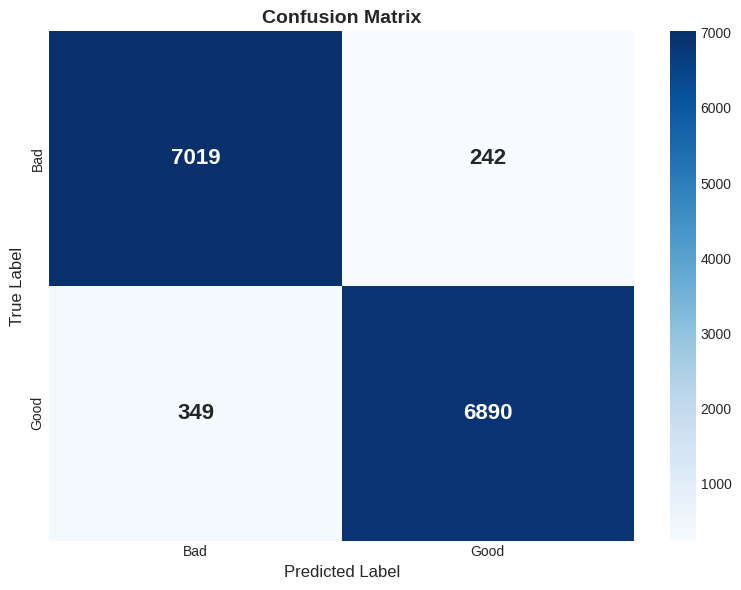

In [57]:
# Confusion matrix - USE y_test_pca
cm = confusion_matrix(y_test_pca, y_pred)
tn, fp, fn, tp = cm.ravel()

print("="*80)
print("CONFUSION MATRIX BREAKDOWN")
print("="*80)
print(f"\nTrue Negatives (Correctly identified Bad):   {tn:,}")
print(f"False Positives (Bad labeled as Good):       {fp:,}")
print(f"False Negatives (Good labeled as Bad):       {fn:,}")
print(f"True Positives (Correctly identified Good):  {tp:,}")

# Visualize
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'],
            annot_kws={'fontsize': 16, 'fontweight': 'bold'})
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
ax.set_title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

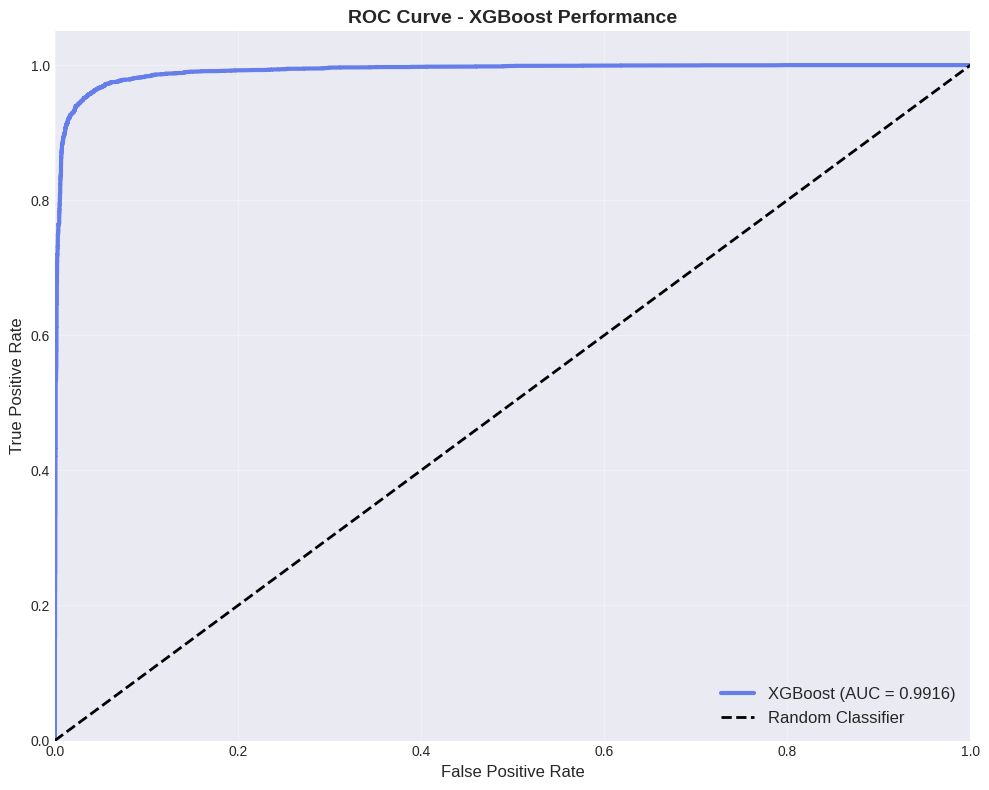

In [58]:
# ROC Curve - USE y_test_pca
fpr, tpr, thresholds = roc_curve(y_test_pca, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='#667eea', lw=3, label=f'XGBoost (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - XGBoost Performance', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 11. Business Impact Analysis

In [59]:
print("="*80)
print("BUSINESS IMPACT ANALYSIS")
print("="*80)

# Get confusion matrix values
cm = confusion_matrix(y_test_pca, y_pred)
tn, fp, fn, tp = cm.ravel()

# Assumptions
avg_loss_per_bad = 3000
avg_revenue_per_good = 300

# Calculate costs
cost_missed_bad = fp * avg_loss_per_bad  # FP = bad labeled as good
cost_rejected_good = fn * avg_revenue_per_good  # FN = good labeled as bad
total_cost = cost_missed_bad + cost_rejected_good

# Baseline (approve everyone)
total_bad = tn + fp  # All bad customers
baseline_cost = total_bad * avg_loss_per_bad
savings = baseline_cost - total_cost

print(f"\n💰 FINANCIAL IMPACT:")
print(f"  Cost of missed bad customers: ${cost_missed_bad:,.0f}")
print(f"  Cost of rejected good customers: ${cost_rejected_good:,.0f}")
print(f"  Total operational cost: ${total_cost:,.0f}")

print(f"\n📊 BASELINE COMPARISON:")
print(f"  Baseline cost (approve all): ${baseline_cost:,.0f}")
print(f"  Model cost (with predictions): ${total_cost:,.0f}")
print(f"  SAVINGS: ${savings:,.0f} ({savings/baseline_cost*100:.1f}% reduction)")

print(f"\n🎯 CUSTOMER OUTCOMES:")
print(f"  Bad customers caught: {tn:,} out of {total_bad:,} ({tn/total_bad*100:.1f}%)")
print(f"  Bad customers missed: {fp:,}")
print(f"  Good customers approved: {tp:,}")
print(f"  Good customers rejected: {fn:,}")

BUSINESS IMPACT ANALYSIS

💰 FINANCIAL IMPACT:
  Cost of missed bad customers: $726,000
  Cost of rejected good customers: $104,700
  Total operational cost: $830,700

📊 BASELINE COMPARISON:
  Baseline cost (approve all): $21,783,000
  Model cost (with predictions): $830,700
  SAVINGS: $20,952,300 (96.2% reduction)

🎯 CUSTOMER OUTCOMES:
  Bad customers caught: 7,019 out of 7,261 (96.7%)
  Bad customers missed: 242
  Good customers approved: 6,890
  Good customers rejected: 349


# 12. Multiple Model Comparison

Now let's test multiple algorithms to find the best performer using the same preprocessed data (PCA-transformed with SMOTE+Tomek).

In [60]:
# Install additional libraries
%pip install lightgbm catboost

Note: you may need to restart the kernel to use updated packages.


In [61]:
# Import additional models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                               AdaBoostClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import time

print("✓ Additional models imported successfully")

✓ Additional models imported successfully


In [62]:
# Define model configurations (as functions to create fresh instances)
def get_models():
    """Returns a dictionary of fresh model instances"""
    return {
        'Extra Trees': ExtraTreesClassifier(n_estimators=200, max_depth=10, min_samples_leaf=10, random_state=42, n_jobs=-1),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, max_depth=5, learning_rate=0.05, subsample=0.8, random_state=42),
        'AdaBoost': AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=42),
        'XGBoost': XGBClassifier(n_estimators=500, max_depth=3, random_state=42, eval_metric='logloss'),
        'LightGBM': LGBMClassifier(num_leaves=31, max_depth=5, learning_rate=0.05, n_estimators=200, random_state=42, verbose=-1, n_jobs=-1),
        'CatBoost': CatBoostClassifier(iterations=200, depth=5, learning_rate=0.05, verbose=0, random_state=42),
    }

print(f"✓ Model configuration function created - 13 models available")

✓ Model configuration function created - 13 models available


In [63]:
# Train and evaluate all models with FRESH instances
results = []

print("="*80)
print("TRAINING AND EVALUATING ALL MODELS (FIXED VERSION)")
print("="*80)
print(f"Training Set: {X_train_pca.shape[0]:,} samples | Test Set: {X_test_pca.shape[0]:,} samples")
print(f"Features: {X_train_pca.shape[1]} PCA components\n")

# Get fresh models for each iteration
models_dict = get_models()

for name, model in models_dict.items():
    print(f"🔄 Training {name}...", end=" ", flush=True)
    
    # Train with fresh model instance
    start_time = time.time()
    model.fit(X_train_pca, y_train_pca)
    train_time = time.time() - start_time
    
    # Predict
    y_pred = model.predict(X_test_pca)
    
    # Get probabilities if available
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test_pca)[:, 1]
    else:
        y_pred_proba = y_pred
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_pca, y_pred)
    precision = precision_score(y_test_pca, y_pred, zero_division=0)
    recall = recall_score(y_test_pca, y_pred, zero_division=0)
    f1 = f1_score(y_test_pca, y_pred, zero_division=0)
    
    try:
        roc_auc = roc_auc_score(y_test_pca, y_pred_proba)
    except:
        roc_auc = 0.0
    
    # Confusion matrix
    cm = confusion_matrix(y_test_pca, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'TN': tn,
        'FP': fp,
        'FN': fn,
        'TP': tp,
        'Train Time (s)': train_time
    })
    
    print(f"✓ ({train_time:.2f}s) | Acc: {accuracy:.4f} | F1: {f1:.4f} | ROC-AUC: {roc_auc:.4f}")

print("\n" + "="*80)
print("✅ All models trained and evaluated successfully!")
print("="*80)

TRAINING AND EVALUATING ALL MODELS (FIXED VERSION)
Training Set: 57,996 samples | Test Set: 14,500 samples
Features: 5 PCA components

🔄 Training Extra Trees... ✓ (0.67s) | Acc: 0.8434 | F1: 0.8475 | ROC-AUC: 0.9266
🔄 Training Gradient Boosting... ✓ (31.99s) | Acc: 0.9101 | F1: 0.9097 | ROC-AUC: 0.9729
🔄 Training AdaBoost... ✓ (9.53s) | Acc: 0.7020 | F1: 0.7306 | ROC-AUC: 0.7883
🔄 Training XGBoost... ✓ (0.54s) | Acc: 0.9592 | F1: 0.9589 | ROC-AUC: 0.9916
🔄 Training LightGBM... ✓ (0.28s) | Acc: 0.8971 | F1: 0.8971 | ROC-AUC: 0.9652
🔄 Training CatBoost... ✓ (1.31s) | Acc: 0.8710 | F1: 0.8704 | ROC-AUC: 0.9497

✅ All models trained and evaluated successfully!


## Model Comparison Results

In [64]:
# Create results dataframe
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1-Score', ascending=False).reset_index(drop=True)
results_df['Rank'] = range(1, len(results_df) + 1)

# Reorder columns
results_df = results_df[['Rank', 'Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 
                          'ROC-AUC', 'TN', 'FP', 'FN', 'TP', 'Train Time (s)']]

print("\n" + "="*80)
print("COMPREHENSIVE MODEL COMPARISON - RANKED BY F1-SCORE")
print("="*80)
print(results_df.to_string(index=False))

# Highlight top 3
print("\n" + "="*80)
print("🏆 TOP 3 MODELS")
print("="*80)
for idx, row in results_df.head(3).iterrows():
    print(f"\n{row['Rank']}. {row['Model']}")
    print(f"   Accuracy: {row['Accuracy']:.4f} | Precision: {row['Precision']:.4f} | Recall: {row['Recall']:.4f}")
    print(f"   F1-Score: {row['F1-Score']:.4f} | ROC-AUC: {row['ROC-AUC']:.4f}")
    print(f"   Training Time: {row['Train Time (s)']:.2f}s")


COMPREHENSIVE MODEL COMPARISON - RANKED BY F1-SCORE
 Rank             Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC   TN   FP   FN   TP  Train Time (s)
    1           XGBoost  0.959241   0.966068 0.951789  0.958876 0.991557 7019  242  349 6890        0.544742
    2 Gradient Boosting  0.910069   0.912439 0.906893  0.909658 0.972930 6631  630  674 6565       31.991127
    3          LightGBM  0.897103   0.896072 0.898052  0.897061 0.965173 6507  754  738 6501        0.284266
    4          CatBoost  0.870966   0.872674 0.868214  0.870438 0.949683 6344  917  954 6285        1.311906
    5       Extra Trees  0.843448   0.824899 0.871391  0.847508 0.926554 5922 1339  931 6308        0.671691
    6          AdaBoost  0.702000   0.665833 0.809228  0.730561 0.788338 4321 2940 1381 5858        9.529310

🏆 TOP 3 MODELS

1. XGBoost
   Accuracy: 0.9592 | Precision: 0.9661 | Recall: 0.9518
   F1-Score: 0.9589 | ROC-AUC: 0.9916
   Training Time: 0.54s

2. Gradient Boosting
   Accuracy: 0.

## Performance Visualization

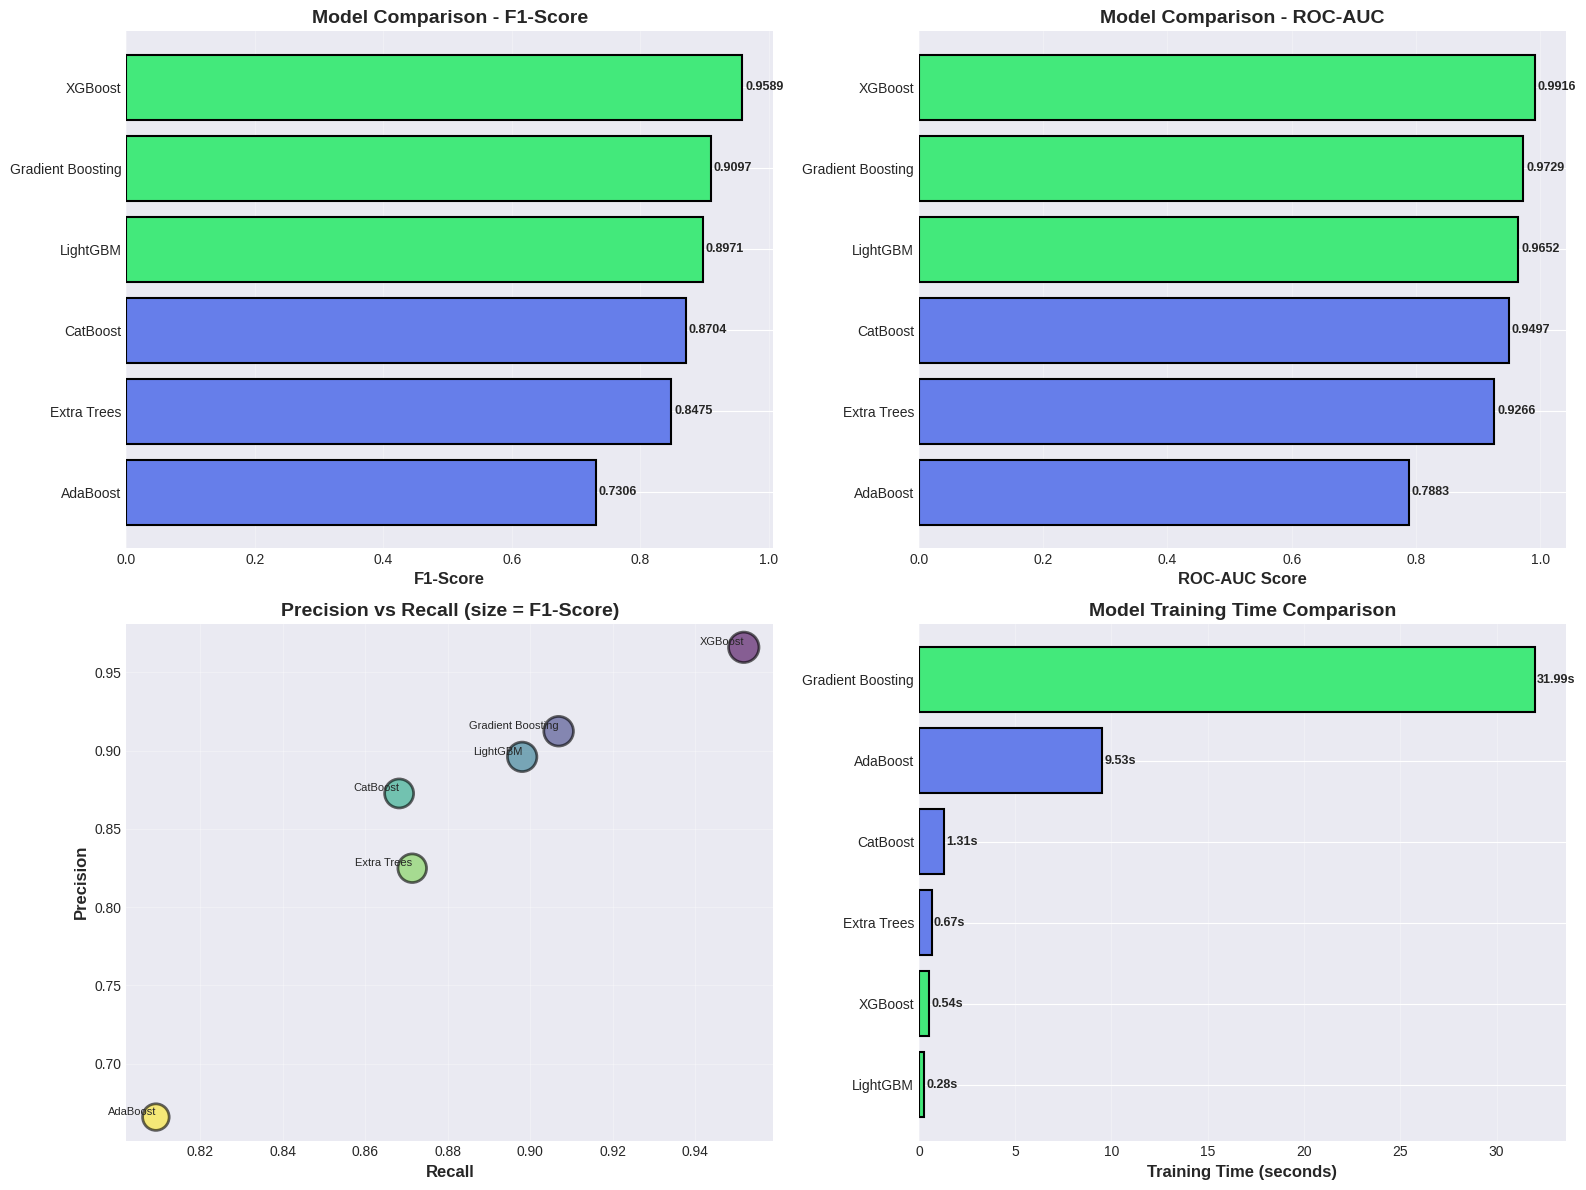

In [65]:
# Visualize model performance comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. F1-Score Comparison
ax1 = axes[0, 0]
colors = ['#43e97b' if i < 3 else '#667eea' for i in range(len(results_df))]
bars = ax1.barh(results_df['Model'], results_df['F1-Score'], color=colors, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('F1-Score', fontsize=12, fontweight='bold')
ax1.set_title('Model Comparison - F1-Score', fontsize=14, fontweight='bold')
ax1.grid(alpha=0.3, axis='x')
ax1.invert_yaxis()
for i, (model, score) in enumerate(zip(results_df['Model'], results_df['F1-Score'])):
    ax1.text(score + 0.005, i, f'{score:.4f}', va='center', fontsize=9, fontweight='bold')

# 2. ROC-AUC Comparison
ax2 = axes[0, 1]
sorted_roc = results_df.sort_values('ROC-AUC', ascending=True)
colors_roc = ['#43e97b' if model in results_df.head(3)['Model'].values else '#667eea' 
              for model in sorted_roc['Model']]
ax2.barh(sorted_roc['Model'], sorted_roc['ROC-AUC'], color=colors_roc, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('ROC-AUC Score', fontsize=12, fontweight='bold')
ax2.set_title('Model Comparison - ROC-AUC', fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3, axis='x')
for i, (model, score) in enumerate(zip(sorted_roc['Model'], sorted_roc['ROC-AUC'])):
    ax2.text(score + 0.005, i, f'{score:.4f}', va='center', fontsize=9, fontweight='bold')

# 3. Precision vs Recall
ax3 = axes[1, 0]
scatter = ax3.scatter(results_df['Recall'], results_df['Precision'], 
                     s=results_df['F1-Score']*500, alpha=0.6, c=range(len(results_df)), 
                     cmap='viridis', edgecolors='black', linewidth=2)
ax3.set_xlabel('Recall', fontsize=12, fontweight='bold')
ax3.set_ylabel('Precision', fontsize=12, fontweight='bold')
ax3.set_title('Precision vs Recall (size = F1-Score)', fontsize=14, fontweight='bold')
ax3.grid(alpha=0.3)
for i, row in results_df.iterrows():
    ax3.annotate(row['Model'], (row['Recall'], row['Precision']), 
                fontsize=8, ha='right', va='bottom')

# 4. Training Time
ax4 = axes[1, 1]
sorted_time = results_df.sort_values('Train Time (s)', ascending=True)
colors_time = ['#43e97b' if model in results_df.head(3)['Model'].values else '#667eea' 
               for model in sorted_time['Model']]
ax4.barh(sorted_time['Model'], sorted_time['Train Time (s)'], color=colors_time, 
         edgecolor='black', linewidth=1.5)
ax4.set_xlabel('Training Time (seconds)', fontsize=12, fontweight='bold')
ax4.set_title('Model Training Time Comparison', fontsize=14, fontweight='bold')
ax4.grid(alpha=0.3, axis='x')
for i, (model, time_val) in enumerate(zip(sorted_time['Model'], sorted_time['Train Time (s)'])):
    ax4.text(time_val + 0.1, i, f'{time_val:.2f}s', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

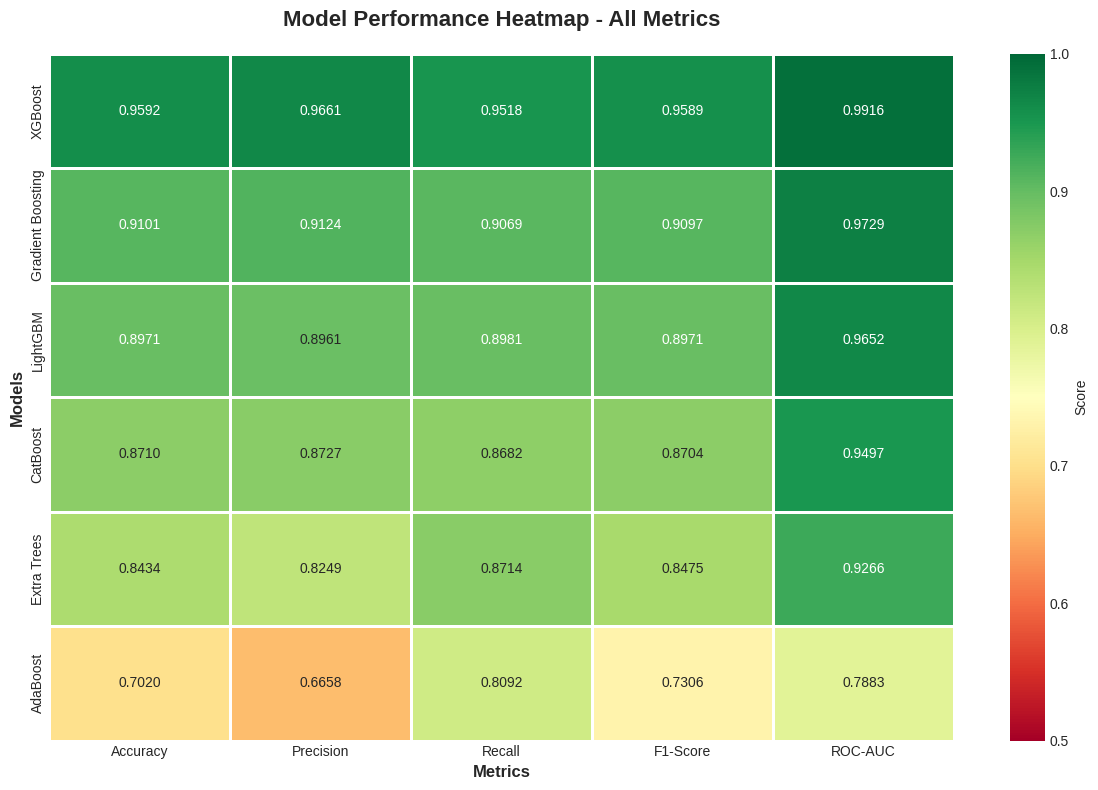

In [66]:
# Performance metrics heatmap
fig, ax = plt.subplots(figsize=(12, 8))

metrics_for_heatmap = results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']].set_index('Model')
sns.heatmap(metrics_for_heatmap, annot=True, fmt='.4f', cmap='RdYlGn', 
            cbar_kws={'label': 'Score'}, linewidths=1, linecolor='white',
            vmin=0.5, vmax=1.0, ax=ax)
ax.set_title('Model Performance Heatmap - All Metrics', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Models', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

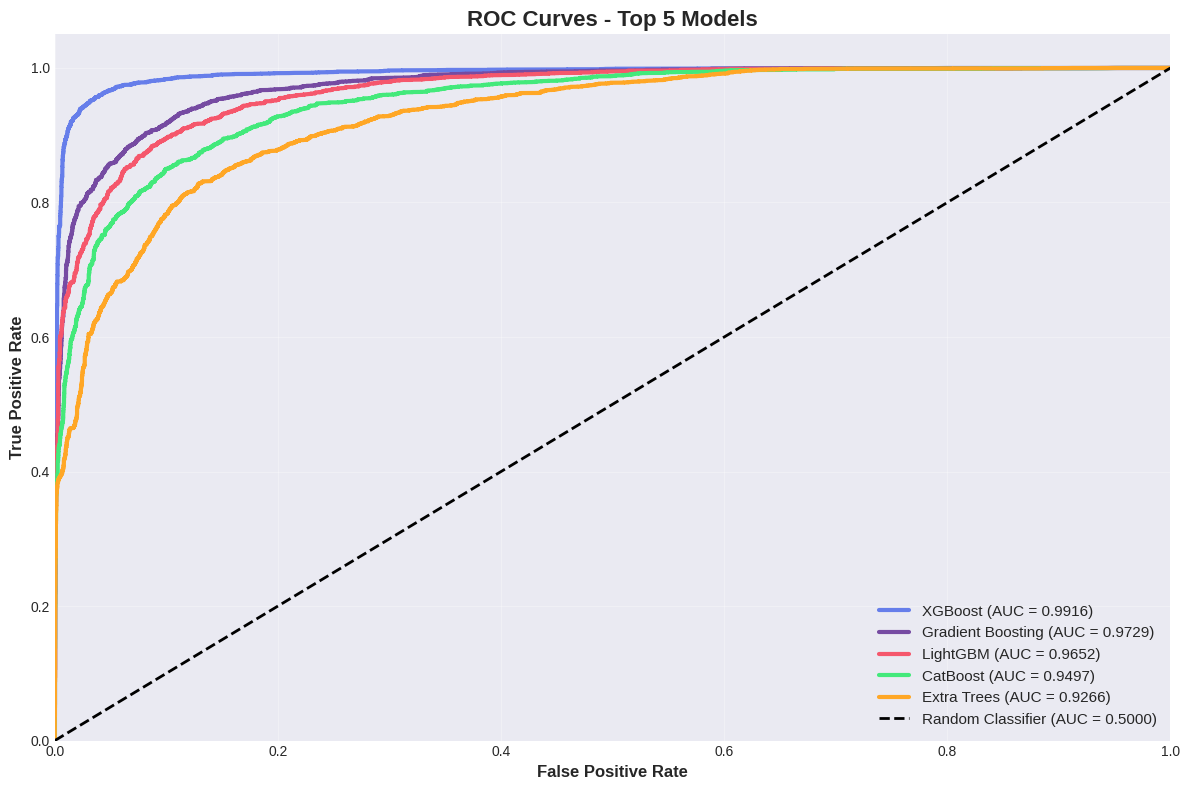

In [67]:
# Plot ROC curves for top models (retrain to get predictions)
plt.figure(figsize=(12, 8))

# Get top 5 models
top_models = results_df.head(5)
colors_palette = ['#667eea', '#764ba2', '#f5576c', '#43e97b', '#ffa726']

# Get fresh model instances
models_dict = get_models()

for idx, (_, row) in enumerate(top_models.iterrows()):
    model_name = row['Model']
    model = models_dict[model_name]
    
    # Retrain the model
    model.fit(X_train_pca, y_train_pca)
    
    # Get predictions
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test_pca)[:, 1]
    else:
        y_pred_proba = model.predict(X_test_pca)
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test_pca, y_pred_proba)
    roc_auc_val = auc(fpr, tpr)
    
    # Plot
    plt.plot(fpr, tpr, color=colors_palette[idx], lw=3, 
             label=f'{model_name} (AUC = {roc_auc_val:.4f})')

# Plot random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier (AUC = 0.5000)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves - Top 5 Models', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=11, framealpha=0.9)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

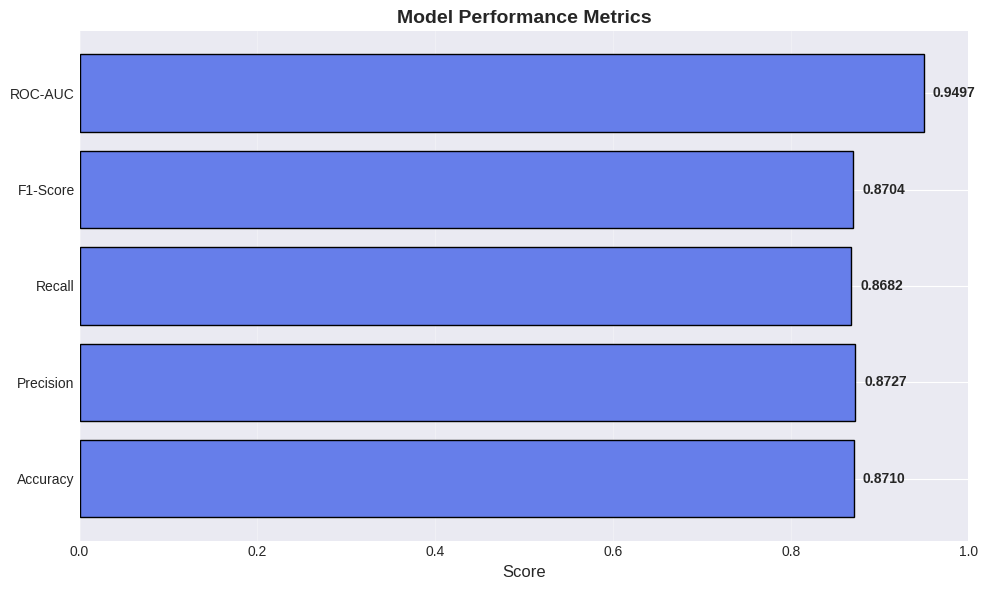

In [68]:
# Visualize performance metrics
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'ROC-AUC': roc_auc
}

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(list(metrics.keys()), list(metrics.values()), color='#667eea', edgecolor='black')
ax.set_xlabel('Score', fontsize=12)
ax.set_title('Model Performance Metrics', fontsize=14, fontweight='bold')
ax.set_xlim([0, 1])
ax.grid(alpha=0.3, axis='x')

# Add value labels
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
            f'{width:.4f}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [69]:
# Perform 5-fold cross-validation on top 5 models
print("="*80)
print("CROSS-VALIDATION ANALYSIS - TOP 5 MODELS")
print("="*80)

cv_results = []
top_5_models = results_df.head(5)

# Get fresh model instances
models_dict = get_models()

for _, row in top_5_models.iterrows():
    model_name = row['Model']
    model = models_dict[model_name]
    
    print(f"\n🔄 Running 5-fold CV for {model_name}...", end=" ", flush=True)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train_pca, y_train_pca, cv=5, 
                                scoring='f1', n_jobs=-1)
    
    cv_results.append({
        'Model': model_name,
        'CV Mean F1': cv_scores.mean(),
        'CV Std F1': cv_scores.std(),
        'CV Min F1': cv_scores.min(),
        'CV Max F1': cv_scores.max()
    })
    
    print(f"✓ Mean F1: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

# Create dataframe
cv_df = pd.DataFrame(cv_results)

print("\n" + "="*80)
print("CROSS-VALIDATION RESULTS SUMMARY")
print("="*80)
print(cv_df.to_string(index=False))

CROSS-VALIDATION ANALYSIS - TOP 5 MODELS

🔄 Running 5-fold CV for XGBoost... ✓ Mean F1: 0.9582 (±0.0023)

🔄 Running 5-fold CV for Gradient Boosting... ✓ Mean F1: 0.9098 (±0.0034)

🔄 Running 5-fold CV for LightGBM... 

KeyboardInterrupt: 